In [2]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
from PIL import Image

2025-10-26 18:14:26.563053: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 18:14:27.171091: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 18:14:30.264367: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## Загрузка данных

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

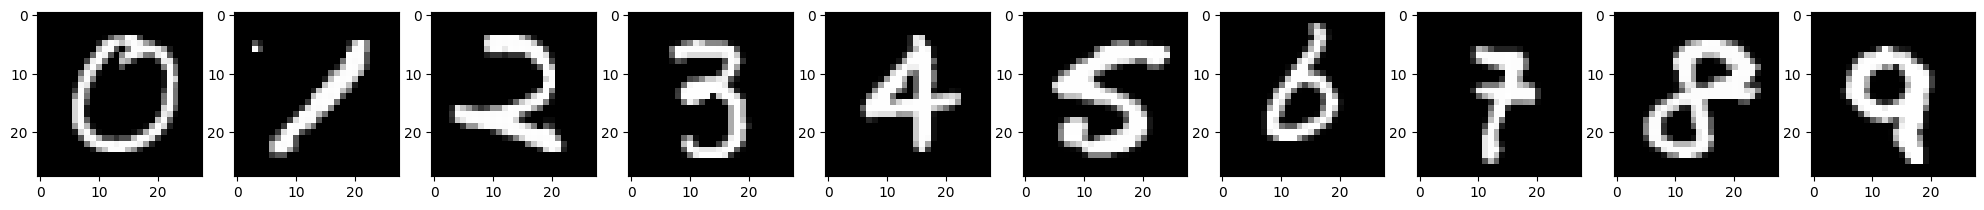

In [3]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train==i)[0]
    index = random.choice(label_indexes)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img), cmap='gray')
plt.show()

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## Создание сверточной нейронной сети

In [26]:
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/home/kirill/Документы/Project/Cifar-10/venv/lib/python3.12/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9407 - loss: 0.1921 - val_accuracy: 0.9848 - val_loss: 0.0527
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9898 - val_loss: 0.0332
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9870 - loss: 0.0414 - val_accuracy: 0.9928 - val_loss: 0.0198
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9888 - loss: 0.0343 - val_accuracy: 0.9938 - val_loss: 0.0174
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9928 - val_loss: 0.0222
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9923 - val_loss: 0.0248
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9924 - loss: 0.0227 - val_accuracy: 0.9921 - val_loss: 0.0257
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9928 - loss: 0.0227 - 

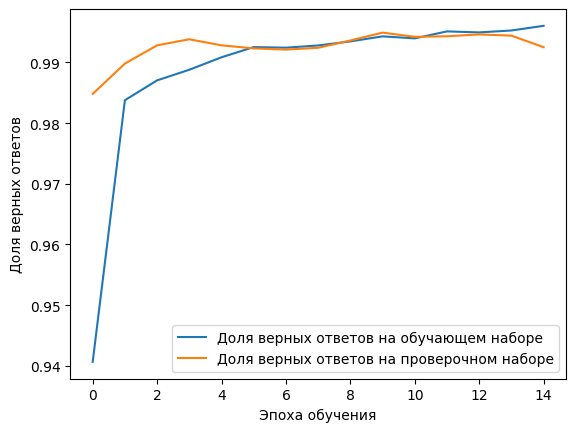

In [27]:
history = model.fit(x_train,
                   y_train,
                   batch_size=batch_size,
                   epochs=15,
                   validation_data=(x_test, y_test),
                   verbose=1)
plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [28]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_2           │ (None, 28, 28, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,612,168 (9.96 MB)

 Trainable params: 870,700 (3.32 MB)

 Non-trainable params: 66 (264.00 B)

 Optimizer params: 1,741,402 (6.64 MB)

## Определение цифр из тестовой выборки

In [29]:
n = 2020
prediction = model.predict(x_test)

print(f'Вывод сети: {prediction[n]}')
print(f'Распознанная цифра: {np.argmax(prediction[n])}')
print(f'Верный ответ: {np.argmax(y_test[n])}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Вывод сети: [1.7338709e-18 4.2337435e-19 1.2656208e-20 1.0000000e+00 2.6261524e-21
 6.1642753e-09 1.4250956e-18 9.6502379e-16 5.7463747e-16 2.0146054e-13]
Распознанная цифра: 3
Верный ответ: 3


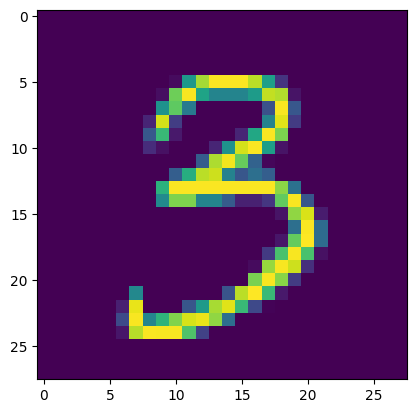

In [30]:
plt.imshow(x_test[n,:,:,0])

## Определение цифр на реальных фотографиях

In [3]:
def change_contrast(img, factor):
    def contrast(pixel):
        return 128 + factor * (pixel - 128)
    return img.point(contrast)


xTestReal = []
yTestReal = []

for i in range(10):
    img_path = f'../data/digits/{i}.png'

    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img1 = change_contrast(img, factor=5.0)
    xTestReal.append(255 - np.asarray(img1))
    yTestReal.append(i)
xTestReal = np.array(xTestReal)
yTestReal = np.array(yTestReal)

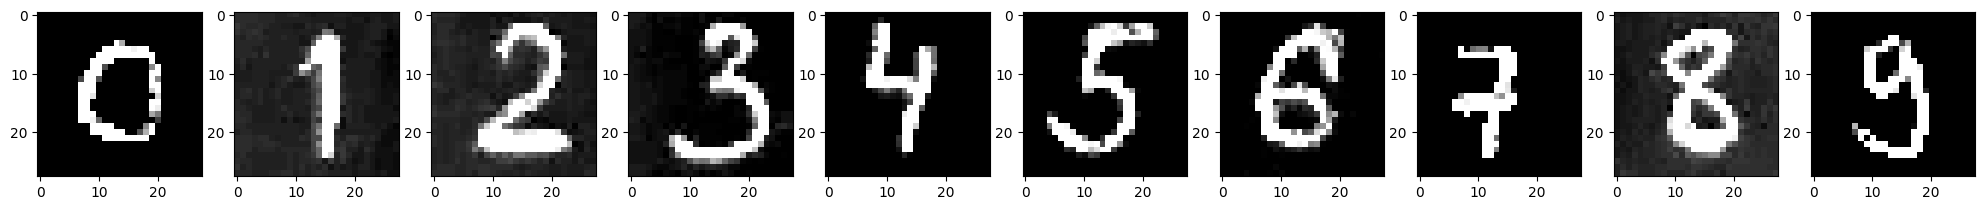

In [4]:
fig, axs = plt.subplots(1, 10, figsize=(25, 3))

for i in range(10):
    axs[i].imshow(Image.fromarray(xTestReal[i]), cmap='gray')

In [33]:
xTestReal.shape

(10, 28, 28)

In [34]:
xTestReal = xTestReal.reshape(xTestReal.shape[0], 28, 28, 1)

In [35]:
xTestReal.shape

(10, 28, 28, 1)

In [36]:
prediction = model.predict(xTestReal)
for i in range(10):
    print(f'Распознанный образ: {np.argmax(prediction[i])} Верный ответ: {yTestReal[i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Распознанный образ: 0 Верный ответ: 0
Распознанный образ: 1 Верный ответ: 1
Распознанный образ: 2 Верный ответ: 2
Распознанный образ: 3 Верный ответ: 3
Распознанный образ: 4 Верный ответ: 4
Распознанный образ: 5 Верный ответ: 5
Распознанный образ: 6 Верный ответ: 6
Распознанный образ: 7 Верный ответ: 7
Распознанный образ: 8 Верный ответ: 8
Распознанный образ: 9 Верный ответ: 9
